# Blood Glucose Control - EDA

**Name:** Kevin Lau

### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [72]:
import pandas as pd

# Load CSV files
data_one= pd.read_csv('../data/gluroo_500030.csv')
data_two = pd.read_csv('../data/gluroo_679372.csv')

# Add Patient ID Columns
data_one['patient_id'] = 500030
data_two['patient_id'] = 679372

# Combine both of them to be just 1 dataset
data = pd.concat([data_one, data_two])

# Remove irrelevant parts of the date and reformat it
data['date'] = data['date'].apply(lambda x: x[:19])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

# Display the first few rows to check the results
data

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,patient_id
0,2024-05-01 00:00:27,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32170,2024-07-31 23:44:59,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
32171,2024-07-31 23:48:03,NaN,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
32172,2024-07-31 23:52:06,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372
32173,2024-07-31 23:55:08,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,679372


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

### Visualization 1: Daily Average Blood Glucose Levels Over A 3 Month Period
As glucose is one of the most important factors to consider when looking at PWD, a graph that monitors those levels over time is an essential one. 

One very important observation that we can note are the spikes in glucose levels. In both patients, we can see that there are some days where they are a 40-60% spike in glucose. This is very dangerous, especially for PWD. As such, this highlights the importance of monitoring your Glucose levels daily,



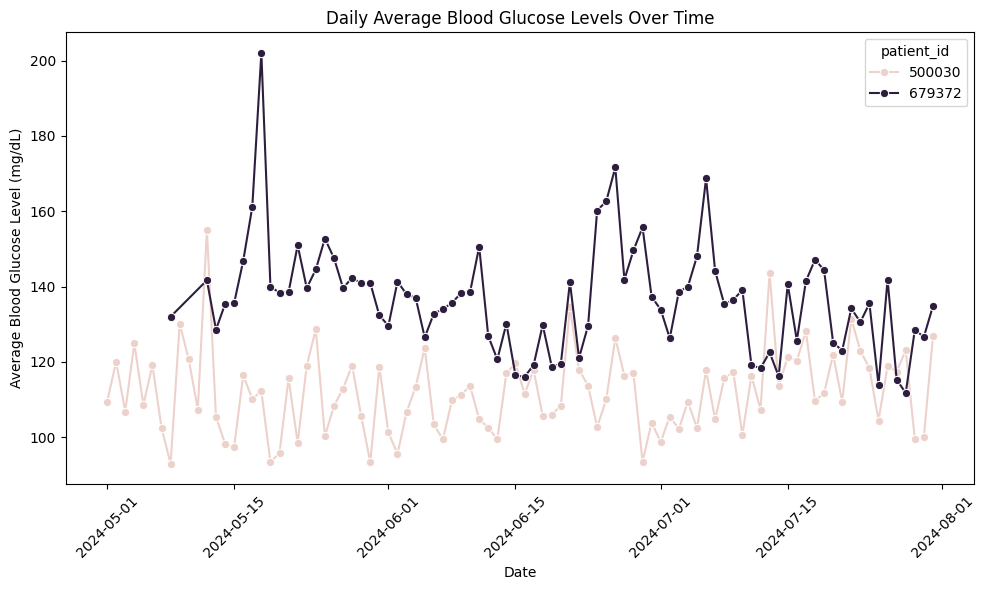

In [95]:
import matplotlib.pyplot as plot
import seaborn as sns
import pandas as pd

# Filter out missing BGL values
glucose_data = data.dropna(subset=['bgl']).copy()

# Ensure the 'date' column is in datetime format using .loc to avoid SettingWithCopyWarning
glucose_data.loc[:, 'date'] = pd.to_datetime(glucose_data['date'], errors='coerce')

# Extract only the date (without time) using .loc
glucose_data.loc[:, 'date_only'] = glucose_data['date'].dt.date

# Group by the date and patient_id to calculate the daily average BGL
daily_avg_glucose = glucose_data.groupby(['date_only', 'patient_id'])['bgl'].mean().reset_index()

# Plot 1: Daily Average Blood Glucose Levels Over Time
plot.figure(figsize=(10, 6))
sns.lineplot(x='date_only', y='bgl', hue='patient_id', data=daily_avg_glucose, marker='o')
plot.title('Daily Average Blood Glucose Levels Over Time')
plot.xlabel('Date')
plot.ylabel('Average Blood Glucose Level (mg/dL)')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()


###  Visualization 2: Scatterplot of Food Intake (Carbs) Vs. Blood Glucose Levels
It is also important to see if the amount of carbs that PWD have are related to their glucose levels. As such, we have made a scatter plot to see if there is any evidence of one.

In our graph, the majority of blood glucose levels are within the 75-150 mg/dl range, regardless of the food intake. If we observe the relationship of the data, we can see that their blood glucose levels have a very slight increase the more food intake we have.
As such, given our observed data, we can note that there is little to no evidence that higher food intake will result in extreme blood glucose spikes (only small increases). However, we need a lot more data and patients to be able to confirm if this is true or not.

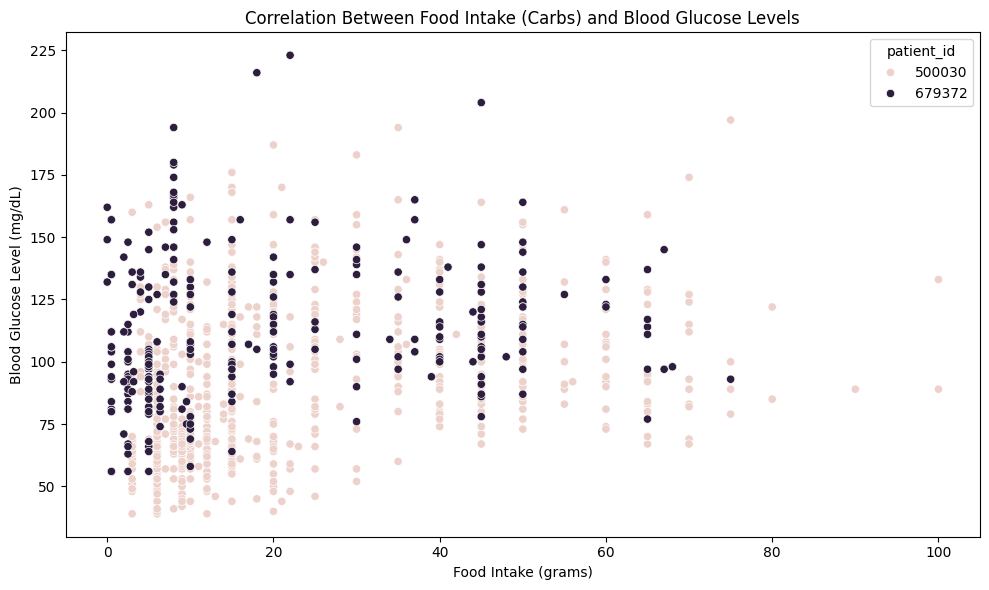

In [96]:
# Reset index to avoid duplicate index errors
data = data.reset_index(drop=True)

# Filter out missing Blood Glucose Levels (BGL)
bgl_data = data.dropna(subset=['bgl'])

# PLOTTING TIME
plot.figure(figsize=(10, 6))
sns.scatterplot(x='food_g', y='bgl', hue='patient_id', data=bgl_data)
plot.title('Correlation Between Food Intake (Carbs) and Blood Glucose Levels')
plot.xlabel('Food Intake (grams)')
plot.ylabel('Blood Glucose Level (mg/dL)')
plot.tight_layout()
plot.show()

###  Visualization 3: Blood Gluecose Levels In A 24 Hou Span (July 1st, 2024) With Insulin Doses & Meals Indicated
It is also important to observe when people with diabetes usually eat their meals and when they take their insulin. As such, it is also important to check how it may affect their blood glucose levels. As such, it is displayed in the charts below (separated by patient), which shhows their BGL levels in a 24 hour range.

We can note that for both patients, before a large drop in glucose, it is usually preceded by an insulin dose. On the otherhand, before a large spike in the blood glucose levels, we can also note that a it is sometimes preceded by a meal. As such, based on the observed evidence, insulin doses seems to have a negative relationship with their glucose levels, while their food intake has a positive relationship. However, we need a lot more data in order to prove that this is true.

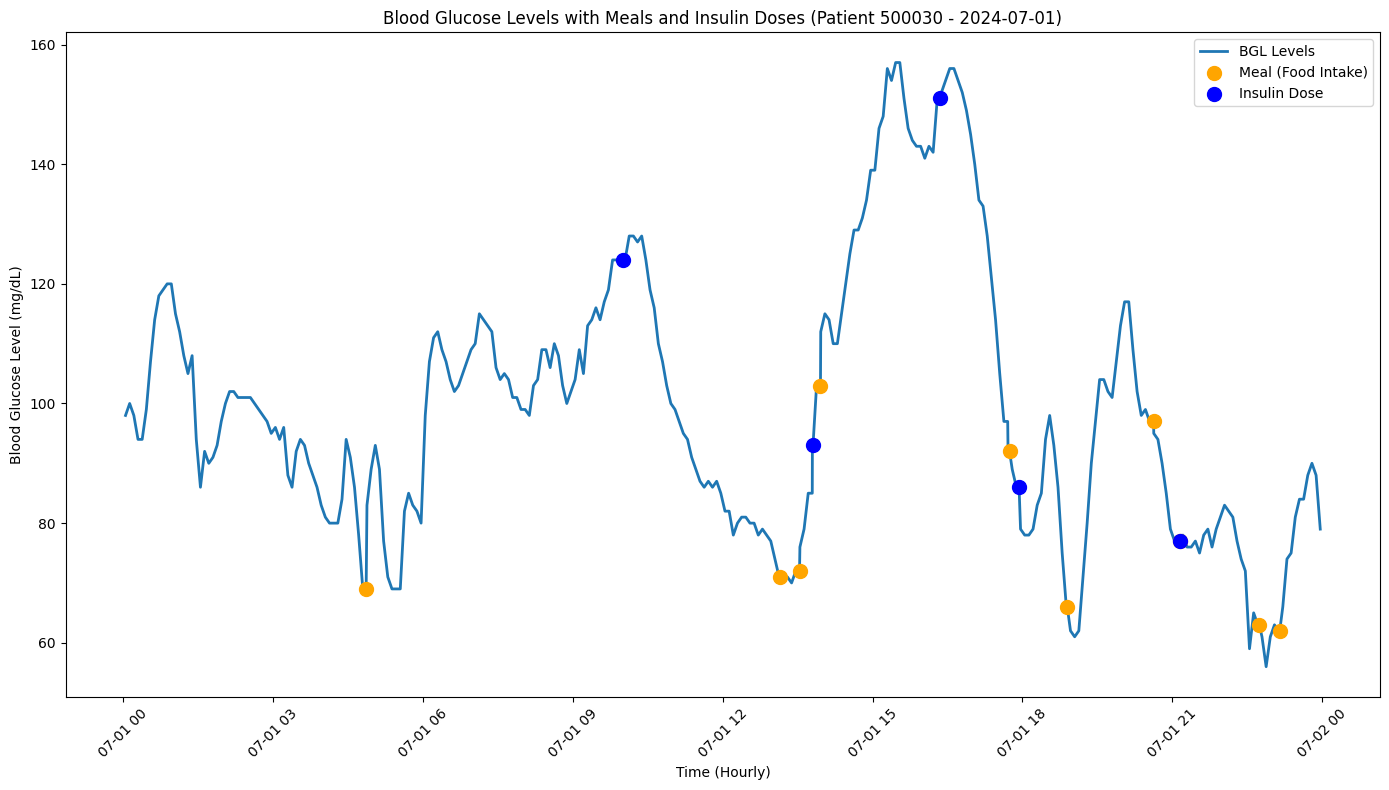

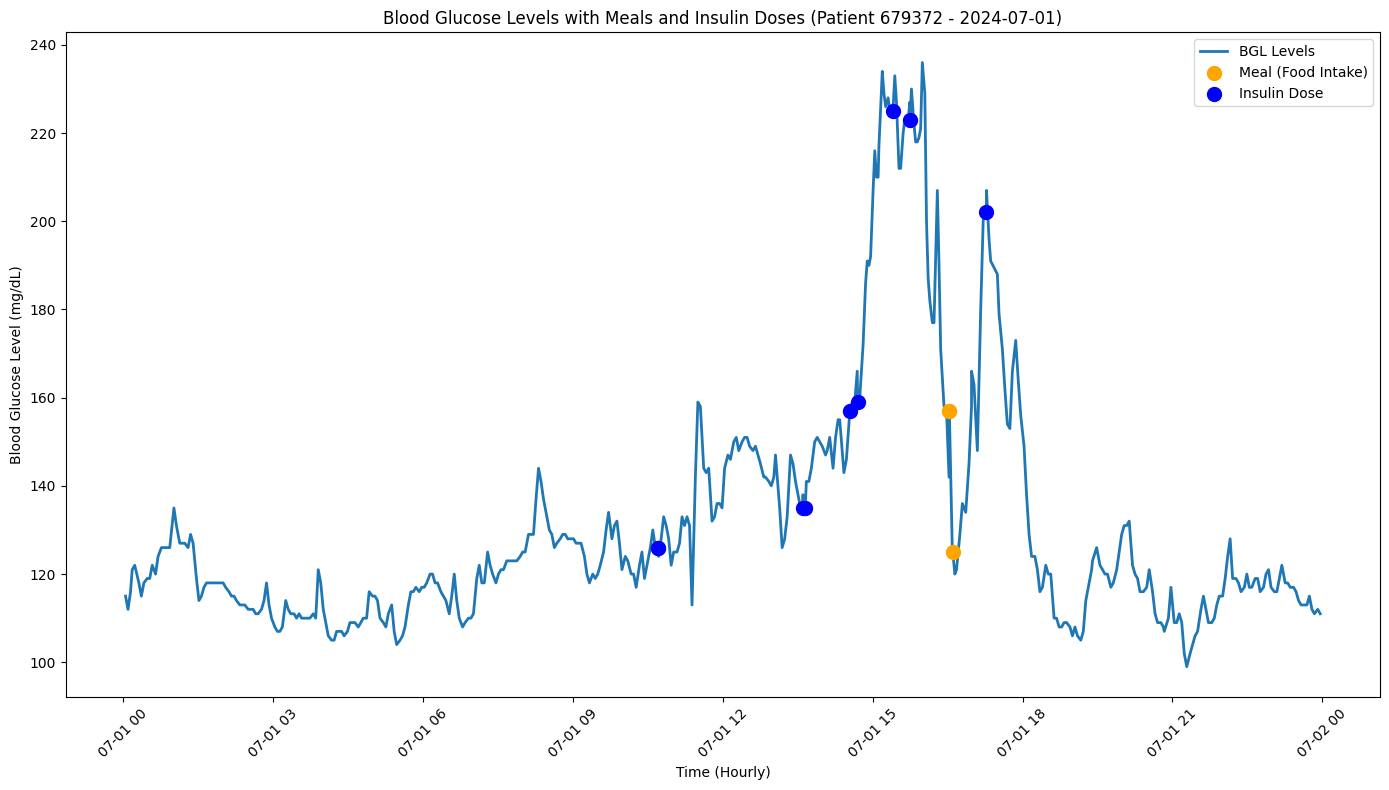

In [98]:
# Ensure that 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Filter the data for a specific day (e.g., 2024-07-01)
specific_day = '2024-07-01'
daily_data = data[(data['date'] >= specific_day) & (data['date'] < '2024-07-02')]  # 1 full day

# Drop any rows with NaN values in 'bgl' (blood glucose level)
daily_data = daily_data.dropna(subset=['bgl'])

# Split the data by patient ID
patient_500030 = daily_data[daily_data['patient_id'] == 500030]
patient_679372 = daily_data[daily_data['patient_id'] == 679372]
# Create the plot for the first patient (500030)
plot.figure(figsize=(14, 8))

# Plot blood glucose levels for patient 500030
sns.lineplot(x='date', y='bgl', data=patient_500030, linewidth=2, label='BGL Levels')

# Add circle markers for food intake (meal times) for patient 500030
meal_data_500030 = patient_500030.dropna(subset=['food_g'])
plot.scatter(meal_data_500030['date'], meal_data_500030['bgl'], color='orange', label='Meal (Food Intake)', s=100, marker='o', zorder=3)

# Add circle markers for insulin doses for patient 500030
dose_data_500030 = patient_500030.dropna(subset=['dose_units'])
plot.scatter(dose_data_500030['date'], dose_data_500030['bgl'], color='blue', label='Insulin Dose', s=100, marker='o', zorder=3)

# Customize the plot for patient 500030
plot.title('Blood Glucose Levels with Meals and Insulin Doses (Patient 500030 - 2024-07-01)')
plot.xlabel('Time (Hourly)')
plot.ylabel('Blood Glucose Level (mg/dL)')
plot.legend(loc='upper right')
plot.xticks(rotation=45)
plot.tight_layout()

# Display the plot for patient 500030
plot.show()

# Create the plot for the second patient (679372)
plot.figure(figsize=(14, 8))

# Plot blood glucose levels for patient 679372
sns.lineplot(x='date', y='bgl', data=patient_679372, linewidth=2, label='BGL Levels')

# Add circle markers for food intake (meal times) for patient 679372
meal_data_679372 = patient_679372.dropna(subset=['food_g'])
plot.scatter(meal_data_679372['date'], meal_data_679372['bgl'], color='orange', label='Meal (Food Intake)', s=100, marker='o', zorder=3)

# Add circle markers for insulin doses for patient 679372
dose_data_679372 = patient_679372.dropna(subset=['dose_units'])
plot.scatter(dose_data_679372['date'], dose_data_679372['bgl'], color='blue', label='Insulin Dose', s=100, marker='o', zorder=3)

# Customize the plot for patient 679372
plot.title('Blood Glucose Levels with Meals and Insulin Doses (Patient 679372 - 2024-07-01)')
plot.xlabel('Time (Hourly)')
plot.ylabel('Blood Glucose Level (mg/dL)')
plot.legend(loc='upper right')
plot.xticks(rotation=45)
plot.tight_layout()

# Display the plot for patient 679372
plot.show()


### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Does insulin sensitivty vary at different times of the day? Is there a pattern within PWD in which they may require more insulin in the evening, and is there a reason behind it?
2. Will physical activity help lower blood glucose levels during the day? Will more intense physical activity have a greater impact on their glucose levels, and does it matter what time of the day it is?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`